In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [6]:
# import movies dataset :
sales_data=pd.read_csv('/content/drive/MyDrive/DATA SET/sales/advertising.csv')

In [7]:
sales_data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [9]:
sales_data.shape

(200, 4)

In [10]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [12]:
# check the number of missing value
sales_data.isnull().sum()
# There are no NULL values in the dataset, hence it is clean.

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [14]:
sales_data.describe(include="all")

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## basic obsevation
Avg expense spend is highest on TV

Avg expense spend is lowest on Radio

Max sale is 27 and min is 1.6

In [19]:
sales_data.groupby('TV').value_counts()

TV     Radio  Newspaper  Sales
0.7    39.6   8.7        1.6      1
4.1    11.6   5.7        3.2      1
5.4    29.9   9.4        5.3      1
7.3    28.1   41.4       5.5      1
7.8    38.9   50.6       6.6      1
                                 ..
289.7  42.3   51.2       25.4     1
290.7  4.1    8.5        17.8     1
292.9  28.3   43.2       21.4     1
293.6  27.7   1.8        20.7     1
296.4  36.3   100.9      23.8     1
Length: 200, dtype: int64

<Axes: xlabel='TV', ylabel='count'>

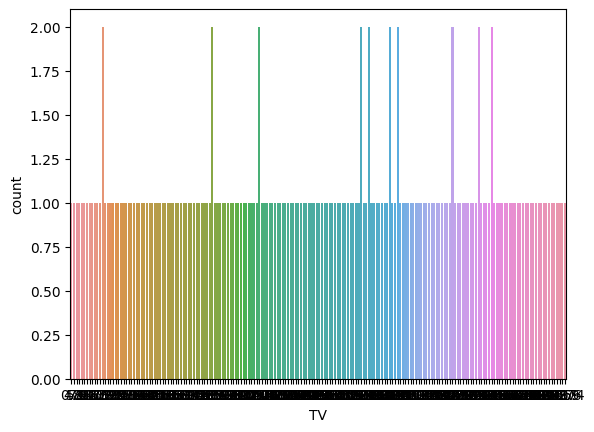

In [17]:
sns.countplot(x='TV', data=sales_data)

In [22]:
sales_data['Radio'].value_counts()

4.1     3
5.7     3
13.9    2
14.3    2
36.9    2
       ..
42.8    1
14.5    1
30.6    1
33.0    1
8.6     1
Name: Radio, Length: 167, dtype: int64

<Axes: xlabel='Radio', ylabel='count'>

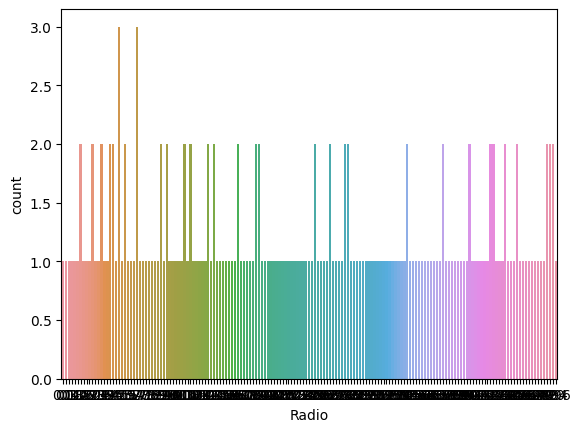

In [27]:
sns.countplot(x='Radio', data=sales_data)

<Axes: xlabel='Newspaper', ylabel='count'>

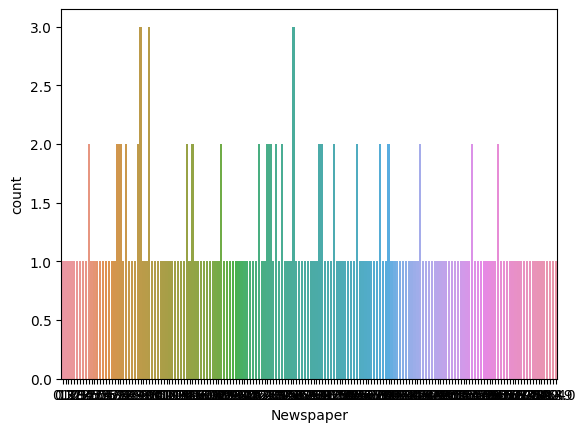

In [29]:
sns.countplot(x='Newspaper', data=sales_data)

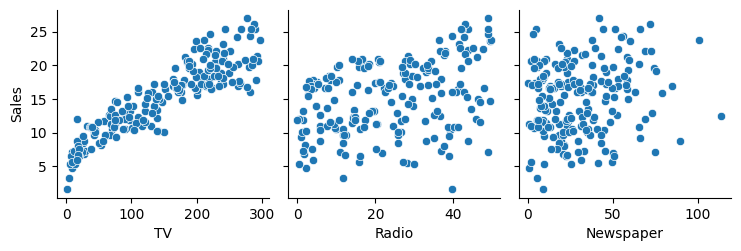

In [31]:
# How all Sales are related with other variables using scatter plot

sns.pairplot(sales_data, x_vars=['TV', 'Radio','Newspaper'], y_vars='Sales', kind='scatter')
plt.show()

In [ ]:
'''observed-'When advertising cost increases in TV Ads the sales will increase as well.
While the for newspaper and radio it is bit unpredictable.'''

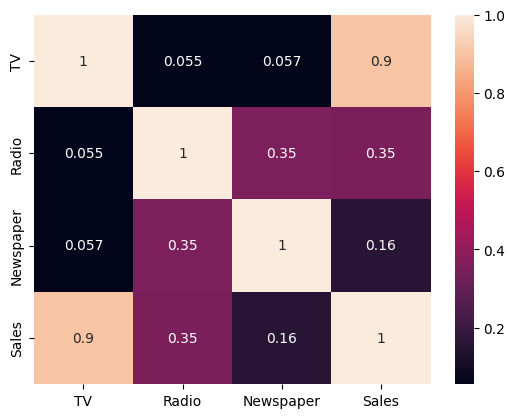

In [32]:
sns.heatmap(sales_data.corr(),annot = True)
plt.show()

In [34]:
X_train, X_test, y_train, y_test = train_test_split(sales_data[['TV']], sales_data[['Sales']], test_size = 0.3,random_state=2)


In [35]:
print(X_train)

        TV
28   248.8
133  219.8
94   107.4
42   293.6
169  284.3
..     ...
43   206.9
22    13.2
72    26.8
15   195.4
168  215.4

[140 rows x 1 columns]


In [37]:
print(y_train)

     Sales
28    18.9
133   19.6
94    11.5
42    20.7
169   20.0
..     ...
43    17.9
22     5.6
72     8.8
15    22.4
168   17.1

[140 rows x 1 columns]


In [39]:
print( X_train.shape, X_test.shape,y_train.shape)

(140, 1) (60, 1) (140, 1)


In [41]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [42]:
X_train_prediction = model.predict(X_train)

In [43]:
print(X_train_prediction)

[[21.04264069]
 [19.36800898]
 [12.87736747]
 [23.62965795]
 [23.09262088]
 [11.02372341]
 [21.33137029]
 [ 8.11910358]
 [ 7.43192712]
 [12.71567889]
 [15.71846678]
 [ 7.70910755]
 [20.54025118]
 [13.37398239]
 [ 9.24514904]
 [ 7.79572643]
 [ 7.6686854 ]
 [ 9.25669823]
 [16.63662692]
 [23.19078895]
 [20.71926353]
 [22.08784186]
 [16.17465955]
 [16.23818007]
 [20.49405444]
 [19.96279197]
 [20.54025118]
 [15.32579452]
 [23.40444885]
 [13.93411782]
 [19.28716469]
 [ 7.35108284]
 [12.09779754]
 [19.40843113]
 [13.63383903]
 [23.5892358 ]
 [17.52013951]
 [22.92515771]
 [18.8425211 ]
 [19.29293928]
 [11.19118658]
 [11.30667842]
 [17.35267634]
 [11.03527259]
 [21.16390712]
 [13.66271199]
 [20.38433719]
 [18.16111923]
 [10.590629  ]
 [18.08604954]
 [ 8.3269889 ]
 [14.48270407]
 [14.83495419]
 [16.89648357]
 [18.99843509]
 [ 8.95641944]
 [11.62428098]
 [12.23061315]
 [12.11512131]
 [13.06792901]
 [14.43073274]
 [19.00420968]
 [10.67147329]
 [17.35267634]
 [23.79134652]
 [11.71089987]
 [13.44327

In [44]:
X_test_prediction = model.predict(X_test)
print(X_test_prediction)

[[16.82141387]
 [10.75231758]
 [ 9.92077632]
 [20.07828381]
 [16.30747517]
 [17.83196748]
 [10.49246093]
 [21.84530899]
 [11.01217422]
 [23.46219478]
 [ 8.04980848]
 [19.24674255]
 [12.30568285]
 [ 7.12587374]
 [19.51814838]
 [ 7.6686854 ]
 [ 8.12487818]
 [15.42396258]
 [18.77900059]
 [18.46139802]
 [19.85884931]
 [21.85685817]
 [ 9.99584601]
 [ 8.80628004]
 [20.21687402]
 [16.39986865]
 [16.78676632]
 [10.6599241 ]
 [19.7953288 ]
 [19.61054185]
 [22.65375188]
 [14.24594579]
 [18.21309056]
 [14.54044999]
 [ 6.98728353]
 [13.01595768]
 [19.39688194]
 [21.01954232]
 [21.98967379]
 [17.21986072]
 [22.48051412]
 [16.11691363]
 [20.63264465]
 [13.78397843]
 [21.42376377]
 [17.86084045]
 [16.89648357]
 [ 6.71587771]
 [10.91400616]
 [ 7.17784507]
 [14.28059335]
 [19.51814838]
 [19.07350478]
 [17.71070105]
 [10.27302643]
 [13.01595768]
 [ 8.49445207]
 [ 7.17207048]
 [ 7.80727561]
 [22.66530107]]


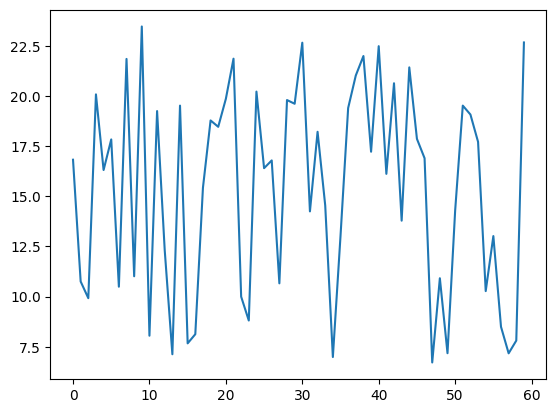

In [48]:
plt.plot(X_test_prediction)

In [53]:
model.coef_


array([[0.05774592]])

In [54]:

model.intercept_

array([6.67545556])

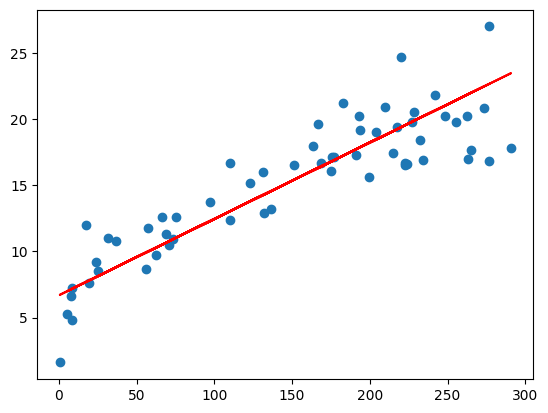

In [55]:

plt.scatter(X_test, y_test)
plt.plot(X_test, 6.67545556 + 0.05774592 * X_test, 'r')
plt.show()